# Epileptic Seizure Recognition
This dataset comes from <a href="https://archive.ics.uci.edu/ml/index.php">here</a> and contains 11500 EEG exams from patients. Each EEG contains 178 variables. The output is divided in 5 categories as follows:

1. Recording of seizure activity.

2. They recorder the EEG from the area where the tumor was located.

3. Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area.

4. eyes closed, means when they were recording the EEG signal the patient had their eyes closed.

5. eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open.

We are mainly interested in class 1, and we can say that classes {2,3,4,5} = 0

In [1]:
import joblib
import pandas as pd
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt  
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Read dataset
df = pd.read_csv('./dataset/Epileptic_Seizure_Recognition.csv')
df.head(5)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


We can see that our data consist of 179 features, though the first one is a patient ID we can ignore in this case. We also have the output column y, in that case we have a 1 indicating a seizure and 0,2,3,4 and 5 are non seizure events. In this case, we will also normalize the y column to generalize those cases as 0.

In [3]:
# Remove Unnamed column, it contains ID's that we won't use.
df = df.drop(['Unnamed'], axis=1)

# Normalize 2,3,4,5 as they are all considered a non-epileptic state we will call 0.
for i in {2,3,4,5}:
    df.y[df.y == i] = 0

Time to do some normalization and scale the data. We are also going to split the data into train and test sets, with a test set consisting of the 20% of the total data we have.

In [4]:
normalized  = preprocessing.normalize(df, norm='l2')
data = preprocessing.StandardScaler().fit_transform(normalized)

X = data[:,:-1]             # Select only the features
y = data[:,-1].astype(int)  # Select only the output

# Do a split for test data.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

Let's try to find an ideal depth, in this case we tried values between 1 and 35 and we found ut that the best value for our test set was around 31.

Best max_depth value to max the accuracy in our test set is 31


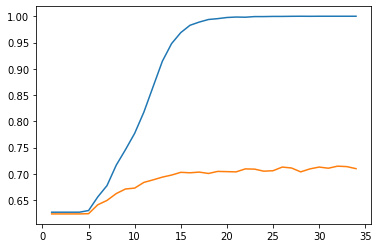

In [5]:
proc_max_depth = False
train_acc = []
test_acc  = []
if proc_max_depth:
    for i in range(1,35):
        model = RandomForestClassifier(150, max_depth=i)
        model.fit(x_train, y_train)
        train_acc.append(accuracy_score(y_train, model.predict(x_train)))
        pipeline_prediction = model.predict(x_test)
        test_acc.append(accuracy_score(y_test, model.predict(x_test)))
else:
    train_acc = [0.6271739130434782, 0.6271739130434782, 0.6271739130434782, 0.6271739130434782, 0.6303260869565217, 0.6563043478260869, 0.6778260869565217, 0.7166304347826087, 0.7460869565217392, 0.7772826086956521, 0.8177173913043478, 0.8660869565217392, 0.9143478260869565, 0.9479347826086957, 0.9689130434782609, 0.9828260869565217, 0.9889130434782609, 0.993804347826087, 0.9954347826086957, 0.9976086956521739, 0.9984782608695653, 0.9981521739130435, 0.9993478260869565, 0.9993478260869565, 0.9996739130434783, 0.9996739130434783, 0.9998913043478261, 1.0, 0.9998913043478261, 1.0, 1.0, 1.0, 1.0, 1.0]
    test_acc  = [0.6239130434782608, 0.6239130434782608, 0.6239130434782608, 0.6239130434782608, 0.6243478260869565, 0.6413043478260869, 0.6495652173913044, 0.662608695652174, 0.671304347826087, 0.6730434782608695, 0.6839130434782609, 0.688695652173913, 0.6939130434782609, 0.6978260869565217, 0.7030434782608695, 0.7021739130434783, 0.7034782608695652, 0.7008695652173913, 0.7047826086956521, 0.7043478260869566, 0.7039130434782609, 0.7095652173913043, 0.7091304347826087, 0.7052173913043478, 0.7060869565217391, 0.7130434782608696, 0.711304347826087, 0.7039130434782609, 0.7095652173913043, 0.7130434782608696, 0.7108695652173913, 0.7147826086956521, 0.7139130434782609, 0.71]
    
print("".join(("Best max_depth value to max the accuracy in our test set is ", str(np.argmax(test_acc)))))
plt.plot(range(1,35), train_acc, label = 'Training accuracy')
plt.plot(range(1,35), test_acc, label = 'Testing accuracy')

Now that we have a good model, lets work on it and make it even better. Let's do some hyperparameter tuning and hope we can improve the model as we go.

In [6]:
model = RandomForestClassifier(150, max_depth=31, max_features='sqrt', random_state = 42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.8778260869565218


Our final model accuracy is of around 87.8%

Last thing to do is to save the model for production.

In [8]:
joblib.dump(model, "production/model.joblib")

['production/model.joblib']